In [3]:
# Load the preprocessed dataset
with open("../data/processed/don_quixote.txt", "r", encoding="utf-8") as file:
    words = file.read().split()
print(f"Total words in dataset: {len(words)}")

Total words in dataset: 427413


We'll start by performing a single run through the text, and plotting the number of unique words (vocabulary size) against the total number of words processed. This will help us visualize Heaps' Law.

In [4]:
import numpy as np

vocab = set()
words_processed = np.arange(1, len(words) + 1)
vocab_sizes = np.zeros(len(words))
for i, word in enumerate(words):
    vocab.add(word)
    vocab_sizes[i] = len(vocab)

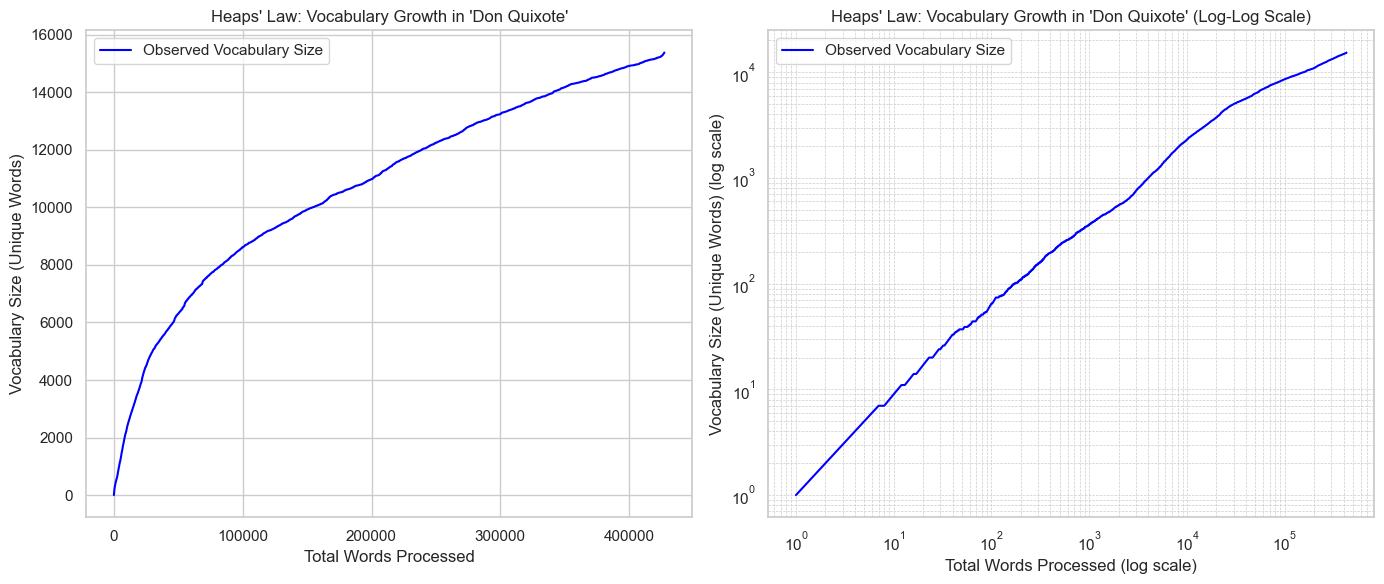

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First figure: Linear scale
ax[0].plot(words_processed, vocab_sizes, label="Observed Vocabulary Size", color="blue")
ax[0].set_xlabel("Total Words Processed")
ax[0].set_ylabel("Vocabulary Size (Unique Words)")
ax[0].set_title("Heaps' Law: Vocabulary Growth in 'Don Quixote'")
ax[0].legend()

# Axis 2: Log-Log Scale
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)  # Add grid for better readability
ax[1].loglog(words_processed, vocab_sizes, label="Observed Vocabulary Size", color="blue")
ax[1].set_xlabel("Total Words Processed (log scale)")
ax[1].set_ylabel("Vocabulary Size (Unique Words) (log scale)")
ax[1].set_title("Heaps' Law: Vocabulary Growth in 'Don Quixote' (Log-Log Scale)")
ax[1].legend()

plt.tight_layout()
plt.show()

We'll try to fit two models to the data:

#### A linear model over the logarithms of the two variables

Provided that
$$
    V(n) \propto n^{\beta} \Longrightarrow V(n) = K n^{\beta} 
$$
where, trivially, V(0) = 0, then we can take logarithms on both sides to get:
$$
    \log(V(n)) = \log(K) + \beta \log(n)
$$

#### A power law model

The issue with the above model, is that the transformation of the variables (taking logarithms) can distort the error structure of the data, which the ordinary least squares (OLS) method of linear regressions assumes to be normally distributed and homoscedastic (i.e., having constant variance).

To avoid this problem, we can fit the original power law model directly to the data using non-linear least squares (NLS). This method minimizes the sum of squared differences between the observed values and the values predicted by the model, without transforming the variables. 

This approach still requires both assumptions to be met. The first one (normality of errors) can be assumed by the Central Limit Theorem, given a sufficiently large sample size. The second one (homoscedasticity) should be checked, but not enough data points are available to do so reliably.


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.log(words_processed).reshape(-1, 1), np.log(vocab_sizes).reshape(-1, 1))
beta = model.coef_[0][0]
K = np.exp(model.intercept_[0])
print(f"Fitted parameters: K = {K:.4f}, beta = {beta:.4f}")

Fitted parameters: K = 23.5100, beta = 0.5050


In [ ]:
# Non linear model

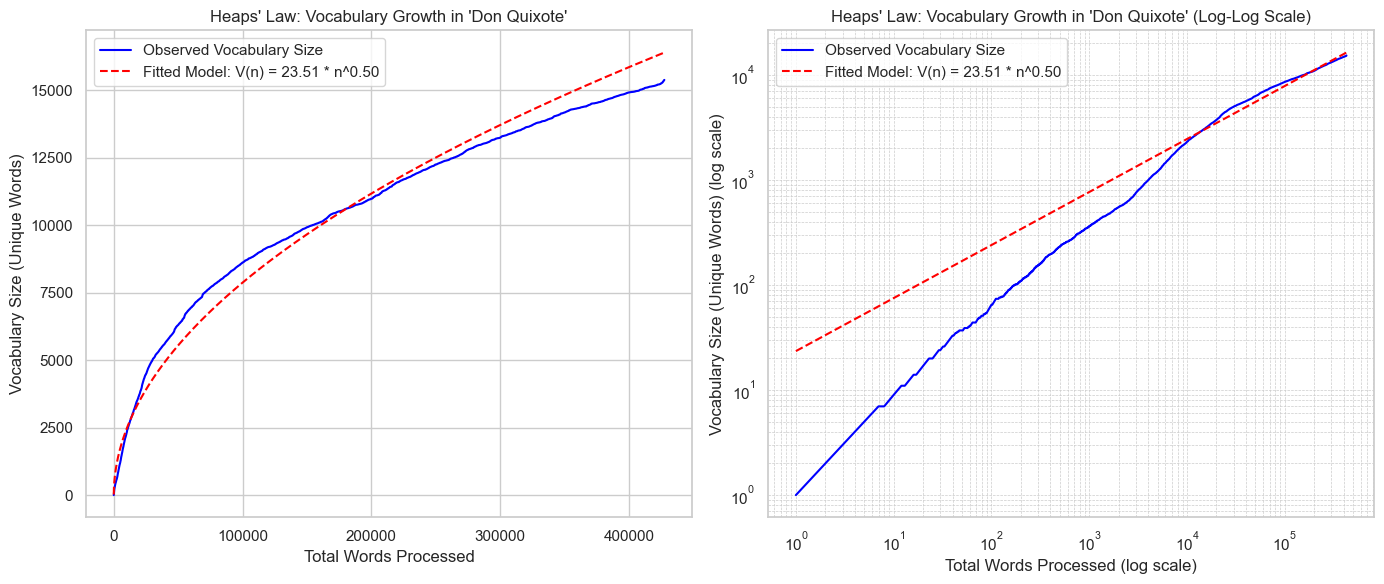

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# First figure: Linear scale
ax[0].plot(words_processed, vocab_sizes, label="Observed Vocabulary Size", color="blue")
ax[0].plot(
    words_processed,
    K * words_processed**beta,
    label=f"Fitted Model: V(n) = {K:.2f} * n^{beta:.2f}",
    color="red",
    linestyle="--",
)
ax[0].set_xlabel("Total Words Processed")
ax[0].set_ylabel("Vocabulary Size (Unique Words)")
ax[0].set_title("Heaps' Law: Vocabulary Growth in 'Don Quixote'")
ax[0].legend()

# Axis 2: Log-Log Scale
ax[1].grid(True, which="both", linestyle="--", linewidth=0.5)  # Add grid for better readability
ax[1].loglog(words_processed, vocab_sizes, label="Observed Vocabulary Size", color="blue")
ax[1].loglog(
    words_processed,
    K * words_processed**beta,
    label=f"Fitted Model: V(n) = {K:.2f} * n^{beta:.2f}",
    color="red",
    linestyle="--",
)
ax[1].set_xlabel("Total Words Processed (log scale)")
ax[1].set_ylabel("Vocabulary Size (Unique Words) (log scale)")
ax[1].set_title("Heaps' Law: Vocabulary Growth in 'Don Quixote' (Log-Log Scale)")
ax[1].legend()

plt.tight_layout()
plt.show()